In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data = pd.read_csv("keynes.csv")
data

,consum,incom,price,produc
0,890.45,908.21,3.66,1203.77
1,886.54,900.68,2.76,1200.36
2,886.33,899.80,2.52,1193.63
3,884.88,898.48,1.72,1193.04
4,885.25,895.78,0.97,1194.11
...,...,...,...,...
147,858.97,871.19,0.34,1181.05
148,863.31,878.91,0.94,1188.16
149,865.39,881.88,1.74,1184.74
150,862.02,876.64,1.98,1183.60


In [3]:
data.info() # no null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   consum  152 non-null    float64
 1   incom   152 non-null    float64
 2   price   152 non-null    float64
 3   produc  152 non-null    float64
dtypes: float64(4)
memory usage: 4.9 KB


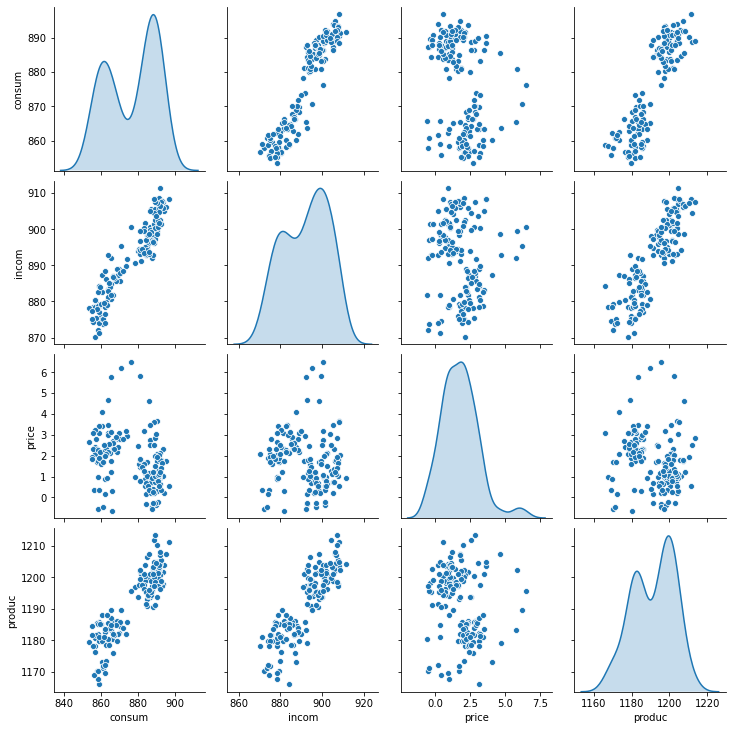

In [4]:
sns.pairplot(data,diag_kind ="kde")

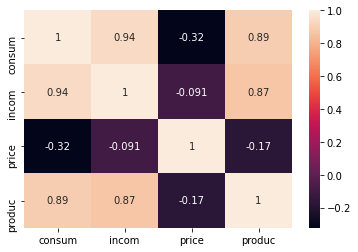

In [4]:
sns.heatmap(data.corr(),annot = True)
# This shows that price is not that significant variable as compared to consum, produc 

In [5]:
x = data[['incom','price','produc']]
y = data['consum']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(121, 3)
(31, 3)
(121,)
(31,)


In [8]:
lm = LinearRegression()

In [9]:
lm.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred = lm.predict(x_test)

In [11]:
y_pred[:5]

array([860.06085832, 887.28474985, 890.37082909, 864.30097732,
       894.26951272])

In [12]:
y_test.head()

120    856.70
76     886.73
0      890.45
99     866.46
36     888.91
Name: consum, dtype: float64

In [14]:
# M1, M2, M3 Values
m_values = lm.coef_

for i,col_name in enumerate(x_train.columns):
    print("Coefficients of {} is {}".format(col_name,m_values[i]))

Coefficients of incom is 0.8932734173330801
Coefficients of price is -2.2016211199308136
Coefficients of produc is 0.2800722275869139


In [15]:
# C value
lm.intercept_

-250.33725098957905

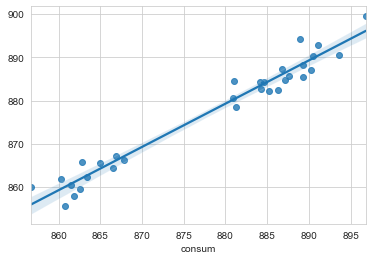

In [14]:
sns.set_style("whitegrid")
sns.regplot(y_test,y_pred)
# sns.regplot()

In [17]:
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)
print("Mean Squared Error : ",mse)
print("R-squared : ",r_squared)

Mean Squared Error :  6.783726105007511
R-squared :  0.9609633307980371


In [18]:
rmse = sqrt(mse)
print("Root mean squared error : ",rmse)

Root mean squared error :  2.6045587159838632


In [19]:
lm.score(x_train,y_train)

0.9495613107761135

In [20]:
lm.score(x_test,y_test)

0.9609633307980371

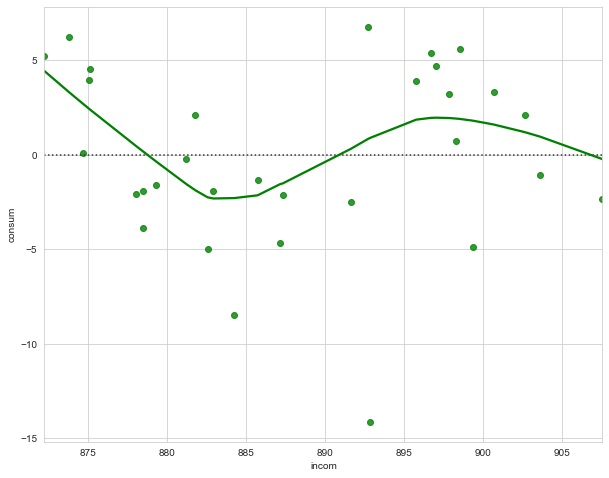

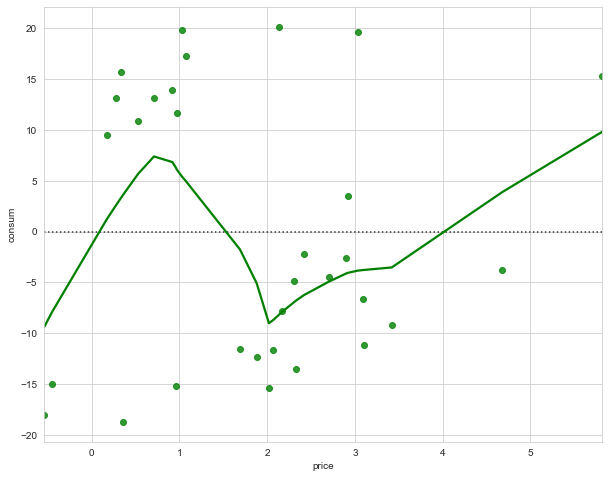

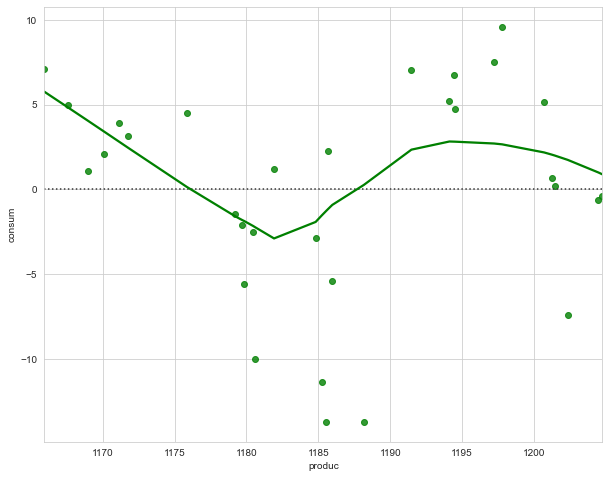

In [21]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= x_test['incom'], y= y_test, color='green', lowess=True )

fig = plt.figure(figsize=(10,8))
sns.residplot(x= x_test['price'], y= y_test, color='green', lowess=True )

fig = plt.figure(figsize=(10,8))
sns.residplot(x= x_test['produc'], y= y_test, color='green', lowess=True )

In [16]:
# Checking through statistical method
import statsmodels.api as sm
X_train_sm = x_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const    -269.544031
incom       0.906386
price      -2.189910
produc      0.286385
dtype: float64

In [15]:
res = lm_1.resid #residuals
fig = sm.qqplot(res)
plt.show()

NameError: name 'lm_1' is not defined

In [17]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 consum   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     789.8
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           1.89e-77
Time:                        18:18:53   Log-Likelihood:                -302.11
No. Observations:                 121   AIC:                             612.2
Df Residuals:                     117   BIC:                             623.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -269.5440     30.881     -8.728      0.0